### Anjana R - 21110251 - RL CIA2 - Code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
from IPython.display import display, clear_output

In [7]:
# Parameters
GRID_SIZE = 100
START = (0, 0)
GOAL = (99, 99)
OBSTACLE_COUNT = 2000
OBSTACLES = set()

In [8]:
# Actions and mappings
ACTIONS = ['up', 'down', 'left', 'right']
ACTION_VECTORS = {'up': (-1, 0), 'down': (1, 0), 'left': (0, -1), 'right': (0, 1)}

In [9]:
# Q-learning parameters
ALPHA = 0.1
GAMMA = 0.9
EPSILON = 0.1
EPISODES = 1000
SNAPSHOT_INTERVAL = 100

In [10]:
# Create obstacles randomly but ensure START and GOAL are not obstacles
def initialize_obstacles():
    global OBSTACLES
    while len(OBSTACLES) < OBSTACLE_COUNT:
        obstacle = (random.randint(0, GRID_SIZE-1), random.randint(0, GRID_SIZE-1))
        if obstacle != START and obstacle != GOAL:
            OBSTACLES.add(obstacle)

initialize_obstacles()

In [11]:
# Initialize Q-table
Q = np.zeros((GRID_SIZE, GRID_SIZE, len(ACTIONS)))

# Helper to get next state
def get_next_state(state, action):
    dx, dy = ACTION_VECTORS[action]
    next_state = (max(0, min(GRID_SIZE - 1, state[0] + dx)), max(0, min(GRID_SIZE - 1, state[1] + dy)))
    return next_state if next_state not in OBSTACLES else state

In [13]:
# Reward function
def get_reward(state):
    if state == GOAL:
        return 100
    elif state in OBSTACLES:
        return -10
    else:
        return -1

In [14]:
# Choose action based on epsilon-greedy policy
def choose_action(state):
    if np.random.rand() < EPSILON:
        return random.choice(ACTIONS)
    else:
        return ACTIONS[np.argmax(Q[state[0], state[1]])]

In [16]:
# Update Q-table
def update_q_table(state, action, reward, next_state):
    action_index = ACTIONS.index(action)
    best_next_action = np.max(Q[next_state[0], next_state[1]])
    Q[state[0], state[1], action_index] += ALPHA * (reward + GAMMA * best_next_action - Q[state[0], state[1], action_index])

In [19]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

In [20]:
# Visualization function now appends figures to `frames` for sequential display
frames = []

def visualize_policy(episode, agent_position=None, path=None, final=False):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_xlim(-0.5, GRID_SIZE - 0.5)
    ax.set_ylim(-0.5, GRID_SIZE - 0.5)
    ax.grid(True)
    
    # Draw obstacles
    for obs in OBSTACLES:
        ax.add_patch(patches.Rectangle((obs[1] - 0.5, obs[0] - 0.5), 1, 1, color='black'))
    
    # Mark start and goal
    ax.add_patch(patches.Rectangle((START[1] - 0.5, START[0] - 0.5), 1, 1, color='red', label="Start"))
    ax.add_patch(patches.Rectangle((GOAL[1] - 0.5, GOAL[0] - 0.5), 1, 1, color='green', label="Goal"))
    
    # Mark agent's current position
    if agent_position:
        ax.plot(agent_position[1], agent_position[0], 'bo', label="Agent")

    # Path visualization
    if path:
        path_x, path_y = zip(*path)
        ax.plot(path_y, path_x, 'c-', linewidth=1, label="Path Taken")

    # Draw policy directions
    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            if (i, j) not in OBSTACLES and (i, j) != GOAL:
                best_action = np.argmax(Q[i, j])
                if best_action == 0: ax.arrow(j, i, 0, -0.3, head_width=0.2, color='blue')
                if best_action == 1: ax.arrow(j, i, 0, 0.3, head_width=0.2, color='blue')
                if best_action == 2: ax.arrow(j, i, -0.3, 0, head_width=0.2, color='blue')
                if best_action == 3: ax.arrow(j, i, 0.3, 0, head_width=0.2, color='blue')

    # Display title and add to frames for animation
    plt.title(f'Policy Visualization - Episode {episode}' if not final else 'Final Optimal Policy')
    plt.legend(loc="upper right")
    
    # Append the frame for later playback if not final
    if not final:
        frames.append(fig)
    else:
        plt.show()
    
    # Save each frame for playback
    plt.savefig(f'policy_snapshot_{episode}.png')
    plt.close(fig)


Episode 900: Snapshot saved


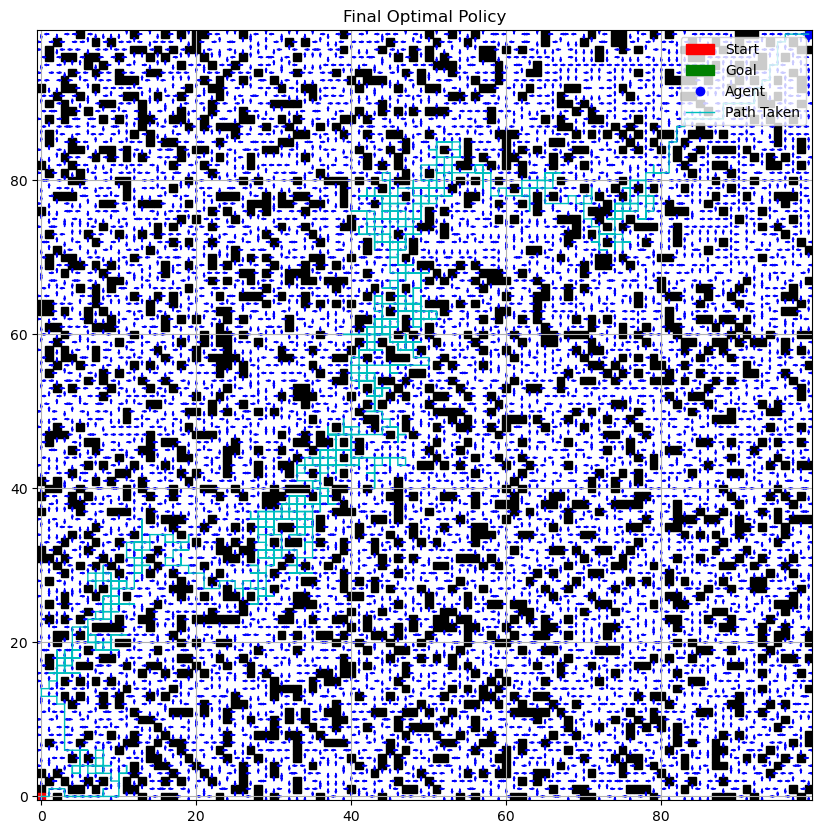

<Figure size 640x480 with 0 Axes>

In [21]:
def train_agent():
    global EPSILON
    for episode in range(EPISODES):
        state = START
        path = [START]

        while state != GOAL:
            action = choose_action(state)
            next_state = get_next_state(state, action)
            reward = get_reward(next_state)

            # Update Q-table and state
            update_q_table(state, action, reward, next_state)
            state = next_state
            path.append(state)

            # Break if goal is reached
            if state == GOAL:
                break
        
        # Decrease exploration rate over time
        EPSILON = max(0.01, EPSILON * 0.995)

        # Save snapshot every SNAPSHOT_INTERVAL episodes
        if episode % SNAPSHOT_INTERVAL == 0:
            clear_output(wait=True)
            visualize_policy(episode, agent_position=state, path=path)
            print(f'Episode {episode}: Snapshot saved')
    
    # Show final policy
    visualize_policy(episode, agent_position=state, path=path, final=True)

train_agent()


#### Initial and Final Policy Comparison

In [24]:
# Display initial and final policies for comparison
def display_initial_policy():
    print("Initial Policy Directions:")
    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            if (i, j) not in OBSTACLES:
                print(f"({i}, {j}): {ACTIONS[np.random.randint(len(ACTIONS))]}")

def display_final_policy():
    print("Final Policy Directions:")
    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            if (i, j) not in OBSTACLES:
                best_action = ACTIONS[np.argmax(Q[i, j])]
                print(f"({i}, {j}): {best_action}")

# Print initial policy
display_initial_policy()
# Print final policy
display_final_policy()


Initial Policy Directions:
(0, 0): up
(0, 1): left
(0, 3): down
(0, 4): down
(0, 5): right
(0, 6): down
(0, 7): up
(0, 8): up
(0, 9): up
(0, 10): down
(0, 11): up
(0, 12): down
(0, 14): down
(0, 15): right
(0, 18): up
(0, 19): right
(0, 20): left
(0, 21): up
(0, 22): left
(0, 24): down
(0, 25): right
(0, 26): right
(0, 27): right
(0, 29): right
(0, 31): right
(0, 32): left
(0, 33): right
(0, 34): up
(0, 35): left
(0, 37): up
(0, 38): down
(0, 39): right
(0, 40): left
(0, 41): up
(0, 42): left
(0, 43): left
(0, 45): right
(0, 46): up
(0, 47): up
(0, 48): down
(0, 49): down
(0, 50): up
(0, 51): left
(0, 52): up
(0, 53): left
(0, 55): right
(0, 57): right
(0, 58): down
(0, 59): down
(0, 60): left
(0, 63): down
(0, 64): down
(0, 65): down
(0, 66): left
(0, 67): down
(0, 68): left
(0, 69): up
(0, 72): down
(0, 73): left
(0, 74): left
(0, 75): right
(0, 76): right
(0, 77): down
(0, 78): up
(0, 80): down
(0, 81): right
(0, 82): up
(0, 83): left
(0, 84): left
(0, 85): right
(0, 86): right
(0, 